In [1]:
# Import packages
%matplotlib inline
import matplotlib.pyplot as plt
from random import uniform, seed
import numpy as np
import pandas as pd
import csv
import time
from igraph import *
from functions_EX4 import *

In [2]:
with open('Highschool_network_edge.csv') as csvfile:
    reader = csv.reader(csvfile)
    edges = [(int(row[0][1:]), int(row[1][1:])) for row in reader]

NodeID = []
Gender = []
Hall = []
Threshold = []

with open('Highschool_network_att.csv') as csvfile:
    reader = csv.reader(csvfile)
    next(reader)
    for row in reader:
        NodeID.append(int(row[0][1:]))
        Gender.append(row[1])
        Hall.append(row[2])
        Threshold.append(row[3])

# g.vs["Gender"] = Gender
# g.vs["Hall"] = Hall
# g.vs["Threshold"] = Threshold

In [3]:
g = Graph(edges, directed=False)
g.delete_vertices(0)
# Number of components
g.vs["NodeID"] = NodeID
print("Number of components: ", g.vcount())


Number of components:  122


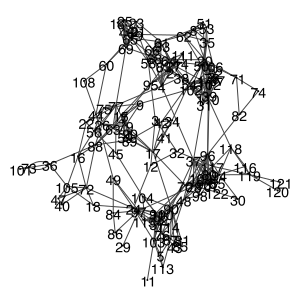

In [8]:
plot(g, bbox = (300,300), margin = 20, layout = g.layout("auto"), vertex_size = 1, vertex_color = "white", vertex_label = g.vs["NodeID"])


In [15]:
greedy_immunized(g, 3, 0.15, mc=600)

([95, 36, 69],
 [74.63333333333334, 50.44166666666667, 39.18666666666667],
 [68.86206698417664, 117.58539700508118, 150.61926889419556])

In [17]:
greedy(g, 3, 0.15, mc=200) # works to slow

([53, 91, 72],
 [[111.265, 29.265], [116.065, 110.285], [115.505, 114.04]],
 [83.30296015739441, 246.99532890319824, 400.85232615470886])

In [13]:
# creating the list of infected nodes per day
No_immunity = IC_immunized(g, [106], [], p = 0.15, mc = 100, timestamps = 28, Monte_Carlo=False)
Degree = IC_immunized(g, [106], [53, 19, 109], p = 0.15, mc = 100, timestamps = 28, Monte_Carlo=False)
Betweenness = IC_immunized(g, [106], [36, 3, 95], p = 0.15, mc = 100, timestamps = 28, Monte_Carlo=False)
Greedy = IC_immunized(g, [106], [53, 91, 72], p = 0.15, mc = 100, timestamps = 28, Monte_Carlo=False)
Greedy2 = IC_immunized(g, [106], [95, 36, 69], p = 0.15, mc = 100, timestamps = 28 , Monte_Carlo=False)

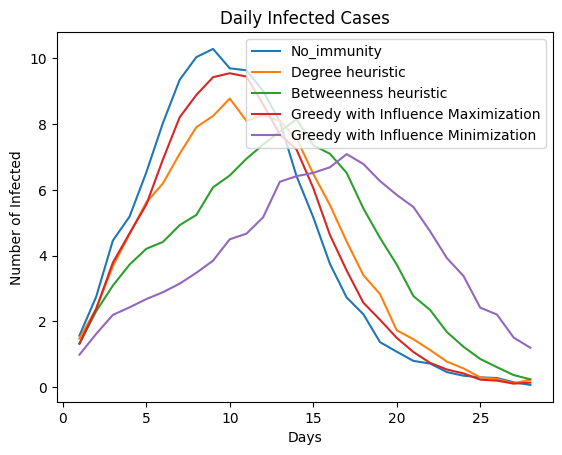

In [14]:
# Creating a list of days as x-axis
days = list(range(1, len(Greedy[2]) + 1))

# Plotting the three lists
plt.plot(days, No_immunity[2], label='No_immunity')
plt.plot(days, Degree[2], label='Degree heuristic')
plt.plot(days, Betweenness[2], label='Betweenness heuristic')
plt.plot(days, Greedy[2], label='Greedy with Influence Maximization')
plt.plot(days, Greedy2[2], label='Greedy with Influence Minimization')

# Adding labels and title
plt.xlabel('Days')
plt.ylabel('Number of Infected')
plt.title('Daily Infected Cases')

# Adding legend
plt.legend()

# Displaying the plot
plt.show()

# Question 19

In [4]:
# Original dictionary with values
original_dict = {0:15, 1:5, 2:5, 3:1, 4:2, 5:2, 6:1, 7:1, 8:1, 9:0, 10:4}

# Calculate total sum of original values
total_sum = sum(original_dict.values())

# Desired total sum
desired_sum = 122

# Scale factor
scale_factor = desired_sum / total_sum

# Create a new dictionary to store the scaled values
scaled_dict = {}

# Scale up each value proportionally and round to nearest integer
for key, value in original_dict.items():
    scaled_value = round(value * scale_factor)
    scaled_dict[key] = scaled_value

# Check if the total sum of scaled values is less than the desired sum
# If so, add the difference to the highest key (">=10")
total_scaled_sum = sum(scaled_dict.values())
if total_scaled_sum < desired_sum:
    diff = desired_sum - total_scaled_sum
    scaled_dict[10] += diff

Threshold_list = []
for key, value in scaled_dict.items():
    Threshold_list.extend([key] * value)

# Shuffle the list to randomize the distribution
np.random.shuffle(Threshold_list)

In [15]:
greedy_Th(g, 7, Threshold_list, mc=100)

([41, 107, 60, 21, 30, 45, 42],
 [2328.0, 2406.0, 2476.0, 2522.0, 2561.0, 2593.0, 2624.0],
 [52.99754595756531,
  96.73492193222046,
  138.5036699771881,
  177.23918294906616,
  214.72830176353455,
  251.2956829071045,
  287.16757583618164])

In [14]:
degree_centrality = g.degree()
sorted_nodes = sorted(range(len(degree_centrality)), key=degree_centrality.__getitem__, reverse=True)
top_7_nodes = sorted_nodes[:7]
print("Top 7 Nodes based on Degree Centrality: ", top_7_nodes)

Top 7 Nodes based on Degree Centrality:  [53, 19, 109, 63, 95, 27, 36]


In [6]:
betweenness_centrality = g.betweenness()
sorted_nodes = sorted(range(len(degree_centrality)), key=betweenness_centrality.__getitem__, reverse=True)
top_7_nodes = sorted_nodes[:7]
print("Top 7 Nodes based on Betweenness Centrality: ", top_7_nodes)

Top 7 Nodes based on Betweenness Centrality:  [36, 3, 95, 23, 69, 76, 16]


In [17]:
Degree = threshold_model(g, [53, 19, 109, 63, 95, 27, 36], Threshold_list,28,  mc=100, Monte_Carlo = True)
Betweenness = threshold_model(g, [36, 3, 95, 23, 69, 76, 16], Threshold_list, 28, mc=100, Monte_Carlo = True)
Greedy = threshold_model(g, [41, 107, 60, 21, 30, 45, 42], Threshold_list, 28, mc=100, Monte_Carlo = True)
Celf = threshold_model(g, [3, 67, 102, 96, 2, 55, 75], Threshold_list, 28, mc=100, Monte_Carlo = True)
Page_rank = threshold_model(g, [53, 19, 63, 95, 27, 23, 109], Threshold_list, 28, mc=100, Monte_Carlo = True)

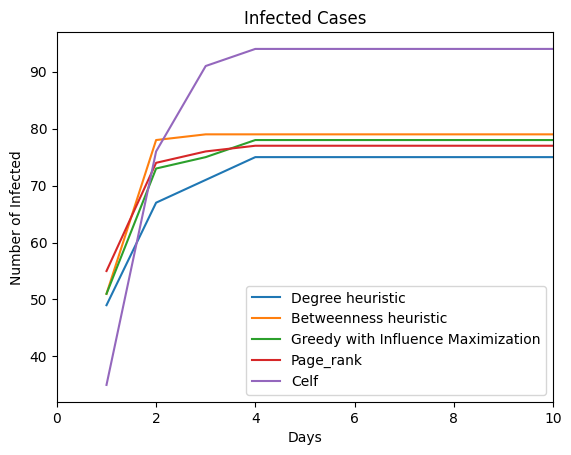

In [18]:
# Creating a list of days as x-axis
days = list(range(1, len(Greedy[3]) + 1))

# Plotting the three list
plt.plot(days, Degree[3], label='Degree heuristic')
plt.plot(days, Betweenness[3], label='Betweenness heuristic')
plt.plot(days, Greedy[3], label='Greedy with Influence Maximization')
plt.plot(days, Page_rank[3], label='Page_rank')
# Adding labels and title
plt.xlabel('Days')
plt.ylabel('Number of Infected')
plt.title('Infected Cases')
# Setting x-axis limit to show only 0 to 5 days
plt.xlim(0, 10)
# Adding legend
plt.legend()

# Displaying the plot
plt.show()

# Question 20

In [16]:
# Run algorithms
celf_output   = celf(g,7,Threshold_list,mc = 50)
greedy_output = greedy_Th(g,7,Threshold_list, mc = 50)

# Print resulting seed sets
print("celf output:   " + str(celf_output[0]))
print("greedy output: " + str(greedy_output[0]))

celf output:   [3, 67, 102, 96, 2, 55, 75]
greedy output: [3, 67, 2, 83, 74, 113, 77]


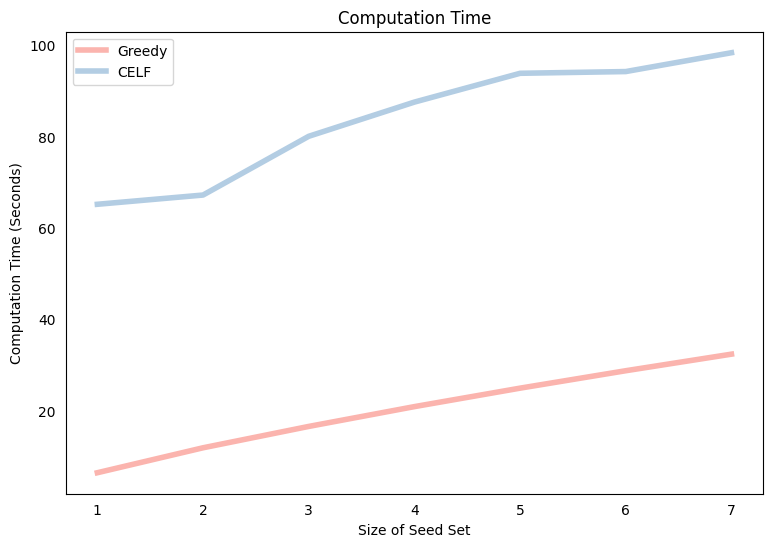

In [9]:
# Plot settings
plt.rcParams['figure.figsize'] = (9,6)
plt.rcParams['lines.linewidth'] = 4
plt.rcParams['xtick.bottom'] = False
plt.rcParams['ytick.left'] = False

# Plot Computation Time
plt.plot(range(1,len(greedy_output[2])+1),greedy_output[2],label="Greedy",color="#FBB4AE")
plt.plot(range(1,len(celf_output[2])+1),celf_output[2],label="CELF",color="#B3CDE3")
plt.ylabel('Computation Time (Seconds)'); plt.xlabel('Size of Seed Set')
plt.title('Computation Time'); plt.legend(loc=2)

In [ ]:
Degree = threshold_model(g, [53, 19, 109, 63, 95, 27, 36], Threshold_list,28,  mc=100, Monte_Carlo = True)
Betweenness = threshold_model(g, [36, 3, 95, 23, 69, 76, 16], Threshold_list, 28, mc=100, Monte_Carlo = True)
Greedy = threshold_model(g, [41, 107, 60, 21, 30, 45, 42], Threshold_list, 28, mc=100, Monte_Carlo = True)
Celf = threshold_model(g, [3, 67, 102, 96, 2, 55, 75], Threshold_list, 28, mc=100, Monte_Carlo = True)
Page_rank = threshold_model(g, [53, 19, 63, 95, 27, 23, 109], Threshold_list, 28, mc=100, Monte_Carlo = True)

In [ ]:
# Creating a list of days as x-axis
days = list(range(1, len(Greedy[3]) + 1))

# Plotting the three list
plt.plot(days, Degree[3], label='Degree heuristic')
plt.plot(days, Betweenness[3], label='Betweenness heuristic')
plt.plot(days, Greedy[3], label='Greedy with Influence Maximization')
plt.plot(days, Page_rank[3], label='Page_rank')
plt.plot(days, Celf[3], label='Celf')
# Adding labels and title
plt.xlabel('Days')
plt.ylabel('Number of Infected')
plt.title('Infected Cases')
# Setting x-axis limit to show only 0 to 5 days
plt.xlim(0, 10)
# Adding legend
plt.legend()

# Displaying the plot
plt.show()

In [29]:
with open('soc-sign-bitcoinalpha.csv') as csvfile:
    reader = csv.reader(csvfile)
    edges = [(int(row[0]), int(row[1])) for row in reader]

# NodeID = []
# Gender = []
# Hall = []
# Threshold = []

# with open('Highschool_network_att.csv') as csvfile:
#     reader = csv.reader(csvfile)
#     next(reader)
#     for row in reader:
#         NodeID.append(int(row[0][1:]))
#         Gender.append(row[1])
#         Hall.append(row[2])
#         Threshold.append(row[3])

bitcoinalpha = Graph(edges, directed=False)
# create a connected subset of the graph with 1001 nodes
bitcoinalpha = bitcoinalpha.subgraph(range(1010))
# count the nuber of edges in the subgraph
bitcoinalpha.ecount()
# delete those nodes without an edge
bitcoinalpha.delete_vertices(bitcoinalpha.vs.select(_degree_eq=0))
# count the number of edges in the subgraph
bitcoinalpha.vcount()


999

In [33]:
# Desired total sum
desired_sum = 999

# Scale factor
scale_factor = desired_sum / total_sum

# Create a new dictionary to store the scaled values
scaled_dict = {}

# Scale up each value proportionally and round to nearest integer
for key, value in original_dict.items():
    scaled_value = round(value * scale_factor)
    scaled_dict[key] = scaled_value

# Check if the total sum of scaled values is less than the desired sum
# If so, add the difference to the highest key (">=10")
total_scaled_sum = sum(scaled_dict.values())
if total_scaled_sum < desired_sum:
    diff = desired_sum - total_scaled_sum
    scaled_dict[10] += diff

Threshold_for_bitcoing = []
for key, value in scaled_dict.items():
    Threshold_for_bitcoing.extend([key] * value)

# Shuffle the list to randomize the distribution
np.random.shuffle(Threshold_for_bitcoing)

In [27]:
bitcoinalpha
# Plot Graph
bitcoinalpha.es["color"], bitcoinalpha.vs["color"], bitcoinalpha.vs["label"] = "#B3CDE3", "#FBB4AE", ""
plot(bitcoinalpha, bbox = (300, 300),margin = 11,layout = bitcoinalpha.layout("kk"))

In [34]:
# Run algorithms
celf_output   = celf(bitcoinalpha,7,Threshold_for_bitcoing,mc = 1)
greedy_output = greedy_Th(bitcoinalpha,7,Threshold_for_bitcoing, mc = 1)

# Print resulting seed sets
print("celf output:   " + str(celf_output[0]))
#print("greedy output: " + str(greedy_output[0]))
# 137, 431, 487, 479, 260, 238, 485,

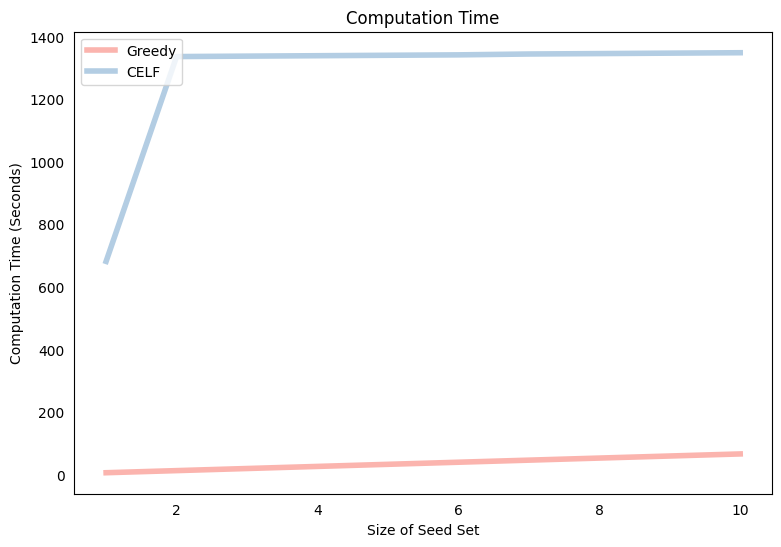

In [26]:
# Plot settings
plt.rcParams['figure.figsize'] = (9,6)
plt.rcParams['lines.linewidth'] = 4
plt.rcParams['xtick.bottom'] = False
plt.rcParams['ytick.left'] = False

# Plot Computation Time
plt.plot(range(1,len(greedy_output[2])+1),greedy_output[2],label="Greedy",color="#FBB4AE")
plt.plot(range(1,len(celf_output[2])+1),celf_output[2],label="CELF",color="#B3CDE3")
plt.ylabel('Computation Time (Seconds)'); plt.xlabel('Size of Seed Set')
plt.title('Computation Time'); plt.legend(loc=2)

In [28]:
pagerank_centrality = bitcoinalpha.pagerank()
sorted_nodes = sorted(range(len(pagerank_centrality)), key=pagerank_centrality.__getitem__, reverse=True)
top_7_nodes = sorted_nodes[:7]
print("Top 7 Nodes based on Betweenness Centrality: ", top_7_nodes)

# bitcoinalpha.pagerank()
#53, 19, 63, 95, 27, 23, 109

# 137, 431, 487, 479, 260, 238, 485

Top 7 Nodes based on Betweenness Centrality:  [1, 10, 3, 0, 176, 2, 9]


In [23]:
degree_centrality = bitcoinalpha.degree()
sorted_nodes = sorted(range(len(degree_centrality)), key=degree_centrality.__getitem__, reverse=True)
top_7_nodes = sorted_nodes[:7]
print("Top 7 Nodes based on Degree Centrality: ", top_7_nodes)

Top 7 Nodes based on Degree Centrality:  [1, 10, 3, 0, 2, 176, 9]


In [24]:
betweenness_centrality = bitcoinalpha.betweenness()
sorted_nodes = sorted(range(len(degree_centrality)), key=betweenness_centrality.__getitem__, reverse=True)
top_7_nodes = sorted_nodes[:7]
print("Top 7 Nodes based on Betweenness Centrality: ", top_7_nodes)

Top 7 Nodes based on Betweenness Centrality:  [1, 0, 3, 10, 14, 9, 7]


In [ ]:
Degree = threshold_model(bitcoinalpha, [53, 19, 109, 63, 95, 27, 36], Threshold_list,28,  mc=100, Monte_Carlo = True)
Betweenness = threshold_model(bitcoinalpha, [36, 3, 95, 23, 69, 76, 16], Threshold_list, 28, mc=100, Monte_Carlo = True)
Greedy = threshold_model(bitcoinalpha, [41, 107, 60, 21, 30, 45, 42], Threshold_list, 28, mc=100, Monte_Carlo = True)
Celf = threshold_model(bitcoinalpha, [3, 67, 102, 96, 2, 55, 75], Threshold_list, 28, mc=100, Monte_Carlo = True)
Page_rank = threshold_model(bitcoinalpha, [53, 19, 63, 95, 27, 23, 109], Threshold_list, 28, mc=100, Monte_Carlo = True)

In [ ]:
# Creating a list of days as x-axis
days = list(range(1, len(Greedy[3]) + 1))

# Plotting the three list
plt.plot(days, Degree[3], label='Degree heuristic')
plt.plot(days, Betweenness[3], label='Betweenness heuristic')
plt.plot(days, Greedy[3], label='Greedy with Influence Maximization')
plt.plot(days, Page_rank[3], label='Page_rank')
plt.plot(days, Celf[3], label='Celf')
# Adding labels and title
plt.xlabel('Days')
plt.ylabel('Number of Infected')
plt.title('Infected Cases')
# Setting x-axis limit to show only 0 to 5 days
plt.xlim(0, 10)
# Adding legend
plt.legend()

# Displaying the plot
plt.show()